## Working with Geometric Objects

### Creating basic geometries

In [1]:
# import necessary modules/libraries
from shapely.geometry import Point, LineString, Polygon
import pandas as pd
import pyproj

In [2]:
# Create a function that generates a shapely Point geometry object 
def createPointGeom(x_coord, y_coord):
    '''This function has two parameters (x_coord, y_coord).The function should create a shapely Point geometry object and return that. '''
    my_point = Point(x_coord, y_coord)
    return my_point

In [3]:
# creating first point -object
my_point1 = createPointGeom(4, 23)
print(my_point1)

# creating second point -object
my_point2 = createPointGeom(4, 42)
print(my_point2)

# creating third point -object
my_point3 = createPointGeom(39, 23)
print(my_point3)

POINT (4 23)
POINT (4 42)
POINT (39 23)


In [4]:
# createLineGeom()
def createLineGeom(obj1, obj2, obj3):
    '''This function takes a list of Shapely Point objects as parameters and returns a LineString object of those input points'''
    for obj in [obj1, obj2, obj3]:
        is_point = isinstance(obj, Point)
        is_tuple = isinstance(obj, tuple)
        if is_point or is_tuple:
            return LineString([obj1, obj2, obj3])

In [5]:
# Creating my_line1 from the points created earlier
my_line1 = createLineGeom(my_point1, my_point2, my_point3)
print(my_line1)

LINESTRING (4 23, 4 42, 39 23)


LINESTRING (5 6, 3 9, 12 23)


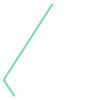

In [6]:
# Creating my_line2 from coordinate tuples
my_line2 = createLineGeom((5, 6), (3, 9), (12, 23))
print(my_line2)
my_line2

In [7]:
# createPolyGeom()
def createPolyGeom(point1, point2, point3):
    '''This function takes a list of coordinate tuples or a list of Shapely Point objects and returns a Polygon object from the input data.'''
    return Polygon([point1, point2, point3])

In [8]:
# creating a polygon using coordinate tuples
my_poly1 = createPolyGeom((5, 6), (3, 9), (12, 23))
print(my_poly1)

POLYGON ((5 6, 3 9, 12 23, 5 6))


POLYGON ((4 23, 4 42, 39 23, 4 23))


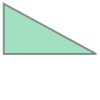

In [9]:
# creating a polygon with point objects
my_poly2 = createPolyGeom(my_point1, my_point2, my_point3)
print(my_poly2)
my_poly2

###  Attributes of geometries

In [10]:
# getCentroid()
def getCentroid(feature):
    '''This function takes any kind of Shapely's geometric -object as input and returns a centroid of that geometry.'''
    return feature.centroid

In [11]:
# Showing that a point is its own centroid
point1_centroid = getCentroid(my_point1)
print(f"The coordinates of point1 are: {my_point1}")
print(f"The centroid of my point1 is {point1_centroid}")

The coordinates of point1 are: POINT (4 23)
The centroid of my point1 is POINT (4 23)


In [12]:
# Centroid of a line
line1_centroid = getCentroid(my_line1)
print(f"The centroid of my line1 is {line1_centroid}")

The centroid of my line1 is POINT (15.84760436334121 32.5)


In [13]:
# Centroid of a polygon
poly1_centroid = getCentroid(my_poly1)
print(f"The centroid of my polygon1 is {poly1_centroid}")

The centroid of my polygon1 is POINT (6.666666666666667 12.66666666666667)


In [14]:
# getArea()
def getArea(polygon):
    '''This function takes a Shapely's Polygon object as input and returns the area of that geometry.'''
    return polygon.area

In [15]:
# Get polygon area
poly1_area = getArea(my_poly1)
print(f"The area of my_poly1 is: {poly1_area} square metres.")

The area of my_poly1 is: 27.5 square metres.


In [16]:
# getLength()
def getLength(feature):
    ''' This function takes either a Shapely's LineString or Polygon object as input. The function checks the type of the input 
        and returns the length of the line if input is LineString and length of the exterior ring if input is Polygon'''
    is_line = isinstance(feature, LineString)
    is_poly = isinstance(feature, Polygon)
    if is_line:
        return feature.length
    elif is_poly:
        feature_ext = feature.exterior
        return feature_ext.length
    else:
        print("Error: Linestring or Polygon geometry required!")

In [17]:
# Getting the length of a line using getLength()
line1_length = getLength(my_line1)
print("The length of my_line1 is: {0:.2f} metres.".format(line1_length))

The length of my_line1 is: 58.82 metres.


In [18]:
# Getting the exterior length of a polygon using getLength()
poly1_length = getLength(my_poly1)
print("The exterior length of my Polygon1 is: {0:.2f} metres.".format(poly1_length))

The exterior length of my Polygon1 is: 38.63 metres.


In [19]:
# using a feature other than those required
point1_length = getLength(my_point1)

Error: Linestring or Polygon geometry required!


### Reading coordinates from a file and creating geometries
The dataset is 'Years.2015-2017.ibtracs_wmo.storms.csv' that consists of tracked paths of tropical storms, hurricanes etc in the years 2015-2017.

In [20]:
# load csv into a pandas dataframe
df = pd.read_csv("Years.2015-2017.ibtracs_wmo.storms.csv")
df.head(2)

,Name,Serial_Num,year,Basin,Sub_basin,Num,Latitude_first,Longitude_first,Latitude_last,Longitude_last,ISO_time_first,ISO_time_last,Nature
0,ADJALI,2014319S06066,2015,SI,MM,1,-6.7,66.4,-11.9,51.4,2014-11-15 06:00:00,2014-11-24 06:00:00,TS
1,0220142015:TWO,2014327S08077,2015,SI,MM,2,-8.0,77.3,-28.9,62.5,2014-11-23 06:00:00,2014-12-02 00:00:00,TS


In [21]:
# Creating a new dataframe made of only the 4 required columns
storm_df = df.loc[:, ('Latitude_first', 'Longitude_first', 'Latitude_last', 'Longitude_last')]
storm_df.head(2)

,Latitude_first,Longitude_first,Latitude_last,Longitude_last
0,-6.7,66.4,-11.9,51.4
1,-8.0,77.3,-28.9,62.5


In [22]:
# Generating storm origin points
def origin_points(dataframe):
    '''This function creates Point objects representing the storm/hurricane origin, using the provided coordinates in the dataframe (parameter)'''
    return (Point(dataframe["Longitude_first"], dataframe["Latitude_first"]))

In [23]:
# Adding the origin points to storm_df
storm_df["orig_points"] = storm_df.apply(origin_points, axis=1)

In [24]:
# Generating destination points
def destination_points(dataframe):
    '''This function creates Point objects representing the storm/hurricane destination, using the provided coordinates in the dataframe (parameter)'''
    return (Point(dataframe["Longitude_last"], dataframe["Latitude_last"]))

In [25]:
# Adding dest_points to storm_df
storm_df["dest_points"] = storm_df.apply(destination_points, axis=1)

In [26]:
# Display storm_df
storm_df.head(2)

,Latitude_first,Longitude_first,Latitude_last,Longitude_last,orig_points,dest_points
0,-6.7,66.4,-11.9,51.4,POINT (66.40000000000001 -6.7),POINT (51.4 -11.9)
1,-8.0,77.3,-28.9,62.5,POINT (77.3 -8),POINT (62.5 -28.9)


## Creating LineStrings that represent the movements.

In [27]:
# Generate linestrings from origin-destination points
def create_lines(dataframe):
    '''This function uses the origin and destination points created above to create
    a Shapely LineString -object between the origin and destination points'''
    return LineString([dataframe["orig_points"], dataframe["dest_points"]])

In [28]:
# Add the storm Linestrings to storm_df
storm_df["storm_lines"] = storm_df.apply(create_lines, axis = 1)

In [29]:
# Current glimpse of storm_df
storm_df.head(2)

,Latitude_first,Longitude_first,Latitude_last,Longitude_last,orig_points,dest_points,storm_lines
0,-6.7,66.4,-11.9,51.4,POINT (66.40000000000001 -6.7),POINT (51.4 -11.9),"LINESTRING (66.40000000000001 -6.7, 51.4 -11.9)"
1,-8.0,77.3,-28.9,62.5,POINT (77.3 -8),POINT (62.5 -28.9),"LINESTRING (77.3 -8, 62.5 -28.9)"


In [30]:
# Obtain pyproj.Geod to facilitate Great Circle computations on the WGS84 ellipse
geod = pyproj.Geod(ellps='WGS84')

In [31]:
# Create a function to calculate lengths
def calculate_length(dataframe):
    '''This function calculates the forward & back azimuths, and distance given the latitudes and longitudes of an origin and destination point.
    The distance is returned. '''
    angle1, angle2, distance = geod.inv(dataframe["orig_points"].x, dataframe["orig_points"].y, dataframe["dest_points"].x, dataframe["dest_points"].y)
    return distance

In [32]:
# Add the storm Linestrings to storm_df
storm_df['o_d_length'] = storm_df.apply(calculate_length, axis = 1)

In [33]:
# Current glimpse of storm_df
storm_df.head(2)

,Latitude_first,Longitude_first,Latitude_last,Longitude_last,orig_points,dest_points,storm_lines,o_d_length
0,-6.7,66.4,-11.9,51.4,POINT (66.40000000000001 -6.7),POINT (51.4 -11.9),"LINESTRING (66.40000000000001 -6.7, 51.4 -11.9)",1.744775e+06
1,-8.0,77.3,-28.9,62.5,POINT (77.3 -8),POINT (62.5 -28.9),"LINESTRING (77.3 -8, 62.5 -28.9)",2.785487e+06


### Find the mean distance in KM of all the origin-destination LineStrings.
NB: Lat/Lon geographic coordinates represent degrees.

In [34]:
# Calculate the mean values in storm_df
mean_values = storm_df.mean(axis = 0, skipna = True, level = None, numeric_only = True)
mean_values

Latitude_first     7.927015e+00
Longitude_first    3.138502e+01
Latitude_last      1.475363e+01
Longitude_last     2.071741e+01
o_d_length         2.406355e+06
dtype: float64

In [36]:
# calculate the mean distance in km (The mean was in metres)
mean_length = mean_values[4] / 1000
print("The mean distance or length is: {0:.2f} kilometres".format(mean_length))

The mean distance or length is: 2406.35 kilometres
